In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
iris.keys()
# dict_keys=()
# dict_keys=(['data', 'target', 'target_names', 'DESCR', 'feature_names','filename'])
# iris['feature_name']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = iris.data[:,2 :] # considering only the petal length and petal
# width as the features
y = iris.target

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2,
                                                     random_state = 0)

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
criterion='gini',
max_depth=2, max_features=None,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0,
presort='deprecated',
random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=2)

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file='iris_tree.dot',
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True)

In [16]:
tree_clf.predict_proba([[2.44, 1]]) # a petal length of 5 and petal
# width of 1.5
# array([[1., 0., 0.]])
tree_clf.predict_proba([[2.45, 1]]) # a petal length of 5 and petal
# width of 1.5
# array([[0. , 0.90740741, 0.09259259]])
tree_clf.predict([[5, 1.5]])
# array([1])

array([1])

In [18]:
print(tree_clf.predict_proba([[6, 1.5]])) # a petal length of 6 and a petal
# width of 1.5
# array([[0. , 0.90740741, 0.09259259]])
prob = tree_clf.predict_proba([[6, 1.5]])
print(iris['target_names'])
# array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
# prob[0][1]
# 0.9074074074074074
print(iris['data'].shape)
# (150, 4)
tree_clf.predict([[5,1.5], [3,1.5]])
# array([1, 1])

[[0.  0.9 0.1]]
['setosa' 'versicolor' 'virginica']
(150, 4)


array([1, 1])

[Text(133.92000000000002, 181.2, 'X[0] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

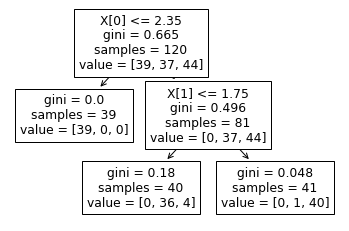

In [20]:
from sklearn.tree import plot_tree
plot_tree(tree_clf)

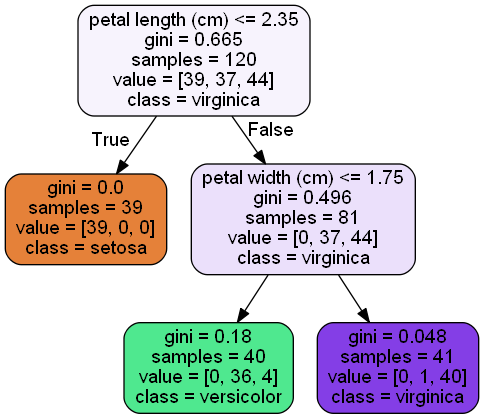

In [22]:
! dot -Tpng iris_tree.dot -o iris_tree.png
from IPython.display import Image
Image (filename='iris_tree.png')